# Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [35]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

### Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

### Respuesta

Los valores entregados son una descripción estadistica de como se distribuyen los valores de los datos, se describe cada atributo a traves de su valor minimo, maximo, cuartiales, mediana y media.

El clustering nos permite agrupar los datos de manera automática sin conocer de ante mano su etiqueta por esta razón es que es un metodo de clasificación **no supervisado**, es muy util para poder analizar datos ya que como su nombre nos dice nos permite agrupar los datos, recibe un parametro el cual es el numero de grupos el cual nos permite generar la cantidad de grupos que necesitemos, este algoritmo consiste en encontrar centroides o centros de gravedad, las instancias de los datos se clasifican de acuerdo a cual de estos centroides esta más cerca.

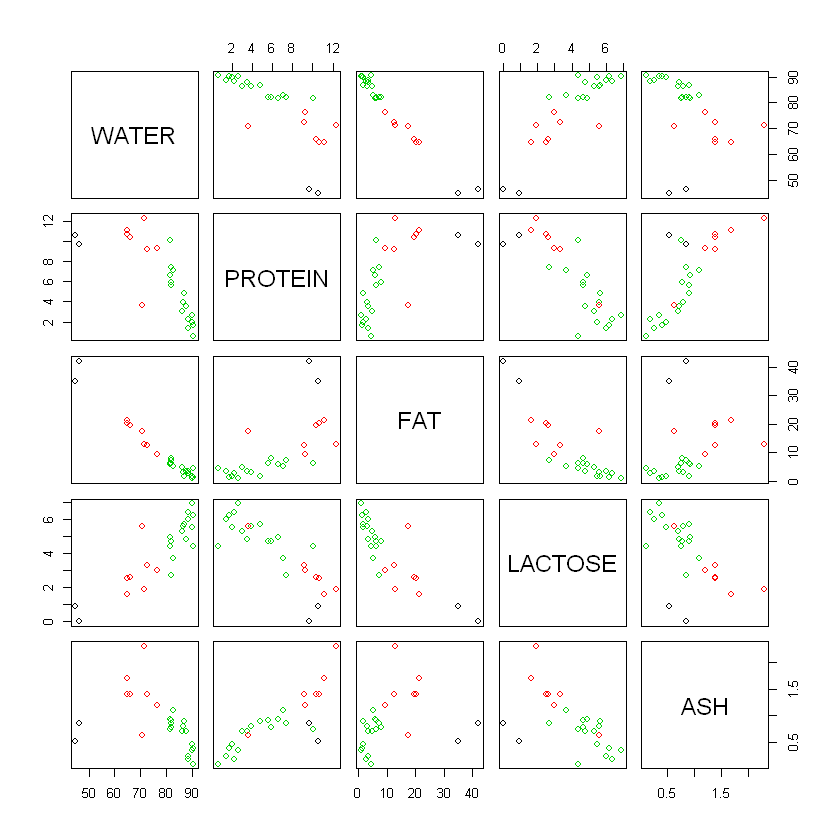

In [36]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

### Ejercicio 2: Interprete y comente los resultados obtenidos. 

**Respuesta**

Se pueden apreciar 3 Agrupamientos (<span style="color:green">**Verde**</span>, **Negro**, <span style="color:red">**Rojo**</span>)

El grupo <span style="color:green">**Verde**</span> se distingue de los demás debido a que presenta:
* **Nivel de Agua**: mayor valor que los otros grupos variando entre **80** y **100**
* **Nivel de Proteina**: menor valor que los otros grupos variando entre **0** y **8**
* **Nivel de Grasa**: menor valor que los otros grupos variando entre **0** y **10**
* **Nivel de Lactosa**: mayor valor que los demás grupos variando entre **3,5** y **7**
* **Nivel de Ash**: menor valor que los el grupo **Negro** y similar al grupo <span style="color:red">**Rojo**</span> variando entre **0** y **0,75**

El grupo **Negro** se distingue de los demás debido a que presenta:
* **Nivel de Agua**:valor intermedio entre los demás grupos **60** y **80**
* **Nivel de Proteina**: mayor valor que el grupo <span style="color:green">**Verde**</span> y similar el grupo <span style="color:red">**Rojo**</span> variando entre **8** y **13**
* **Nivel de Grasa**: valor intermedio entre los demás grupos entre **10** y **25**
* **Nivel de Lactosa**: valor intermedio entre los demás grupos variando entre **1** y **4**
* **Nivel de Ash**: mayor valor que los demás grupos variando entre **0,75** y **2**

El grupo <span style="color:red">**Rojo**</span> se distingue de los demás debido a que presenta:
* **Nivel de Agua**: menor valor que los otros grupos variando entre **0** y **50**
* **Nivel de Proteina**:mayor valor que el grupo <span style="color:green">**Verde**</span> y similar el grupo **negro** variando entre **9** y **11**
* **Nivel de Grasa**: mayor valor que los otros grupos variando entre **35** y **45**
* **Nivel de Lactosa**: menor valor que los demás grupos variando entre **0** y **1,5**
* **Nivel de Ash**: menor valor que los el grupo **Negro** y similar al grupo <span style="color:red">**Verde**</span> variando entre **0,5** y **0,75**

Otra de las caracteristicas que se puede apreciar es que la mayoria de los datos estan agrupados en el grupo <span style="color:green">**Verde**</span>, un grupo intermedio de datos en el grupo **Negro**, y una minoria de datos en el grupo <span style="color:red">**Rojo**</span>

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 2, 7, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 45.65000 10.150000 38.45000 0.450000 0.690000
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          1          1 

Within cluster sum of squares by cluster:
[1]  27.1912 299.9911 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

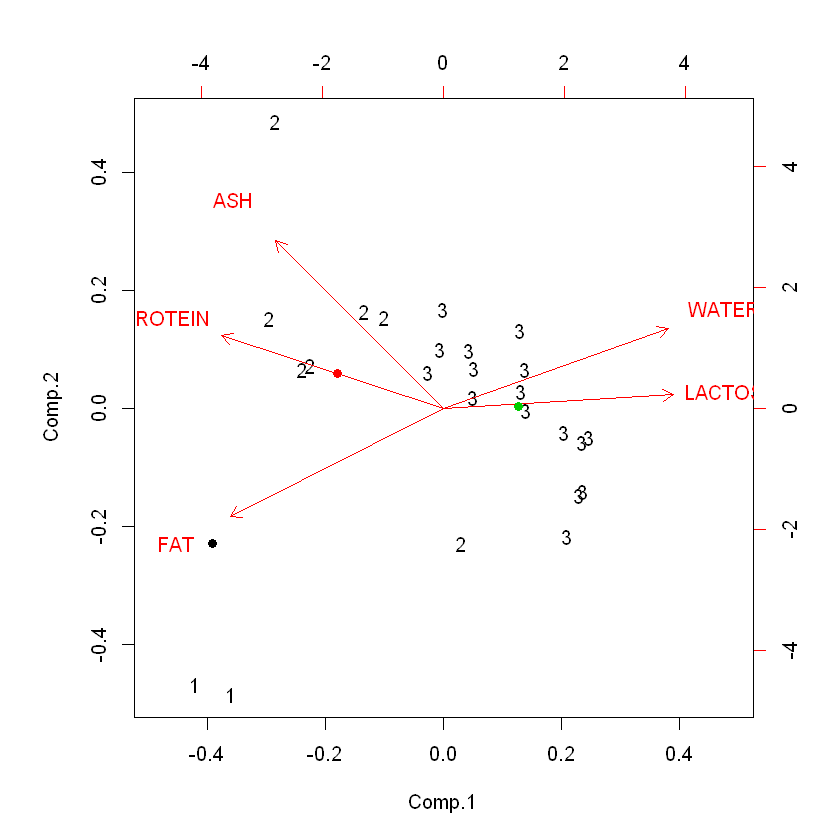

In [37]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

**Respuesta**

### Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

#### Para K = 2

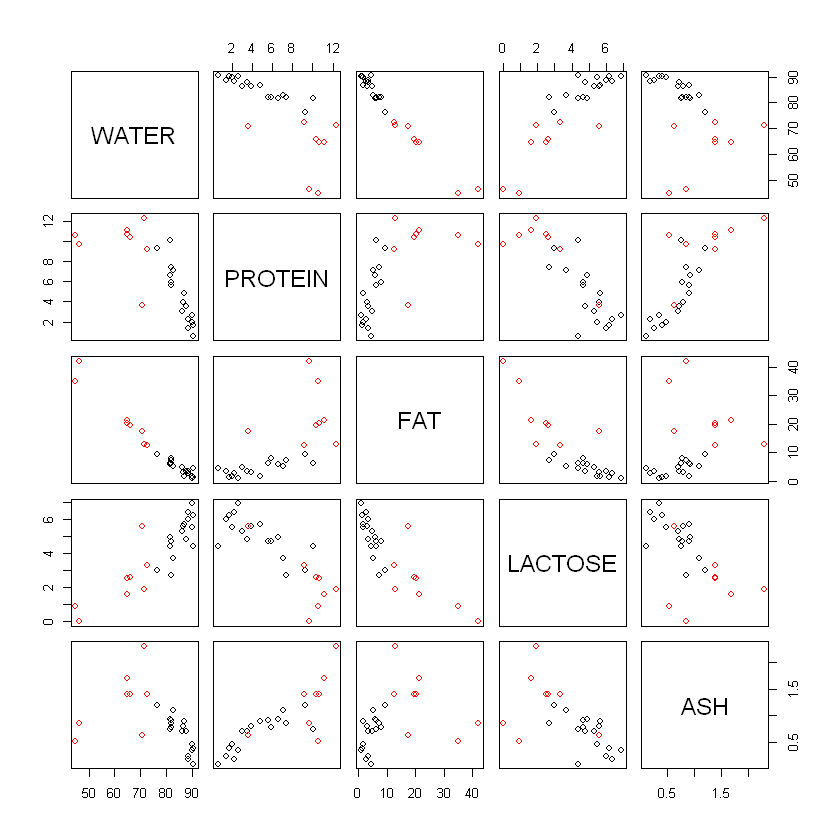

In [38]:
k1=2
cl2<-kmeans(datos,k1,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl2$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

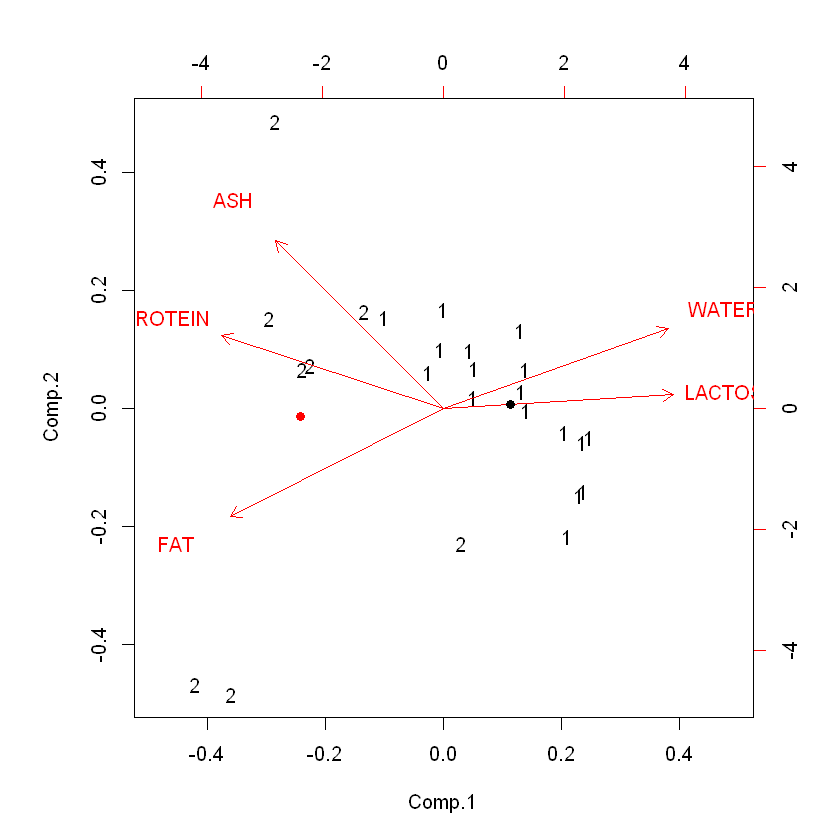

In [39]:
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl2$centers)
res2
cl2
biplot(res,xlabs=cl2$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

#### Para K=4

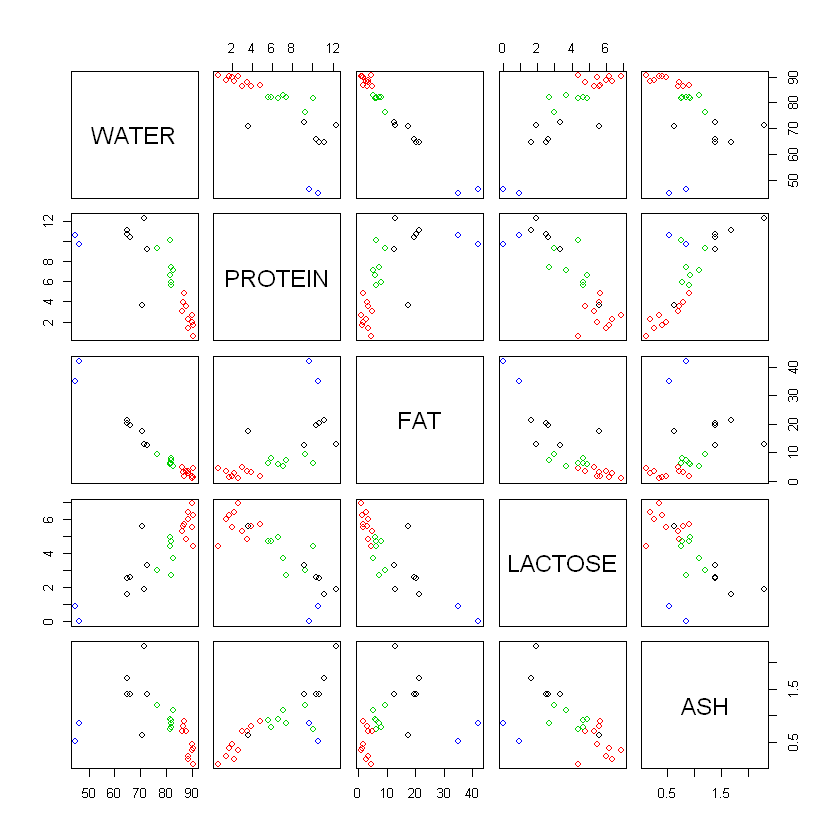

In [40]:
k2=4
cl4<-kmeans(datos,k2,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl4$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
2,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
3,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
4,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957


K-means clustering with 4 clusters of sizes 6, 10, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 68.33333  9.550000 17.41667 2.916667 1.4716667
2 88.50000  2.570000  2.80000 5.680000 0.4850000
3 81.18571  7.428571  6.90000 4.014286 0.9314286
4 45.65000 10.150000 38.45000 0.450000 0.6900000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          2          2          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          3          3          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          4          4 

Within cluster sum of squares by cluster:
[1] 191.74708  59.41225  63.53491  27.19120
 (between_SS / tot

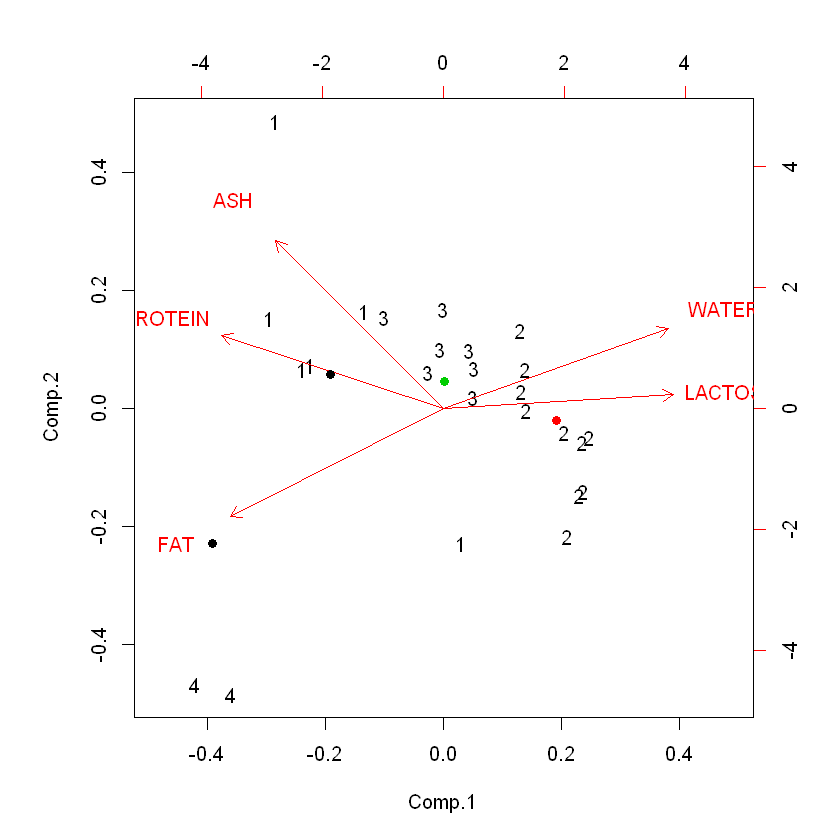

In [41]:
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl4$centers)
res2
cl4
biplot(res,xlabs=cl4$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

| K | sum of squares |
| :----------: | :----------: |
| **4** | 95.1 % | 
| **2** | 68.8 % |

Se puede apreciar que con 4 grupos la aproximación es menor que con 2 grupos ya que la suma de los cuadrados obtenida por 4 grupos se logra minimizar en mayor grado que con 2 grupos
Otro de los valores que nos entrega estos componentes, es la ubición del centroide (Cluster means) en la grafica se puede apreciar la ubicación de cada uno de los centroides y la ubicación de las instancias del dataset, además los ejes que nos muestran en que sentido estan aumentando los valores de los atributos

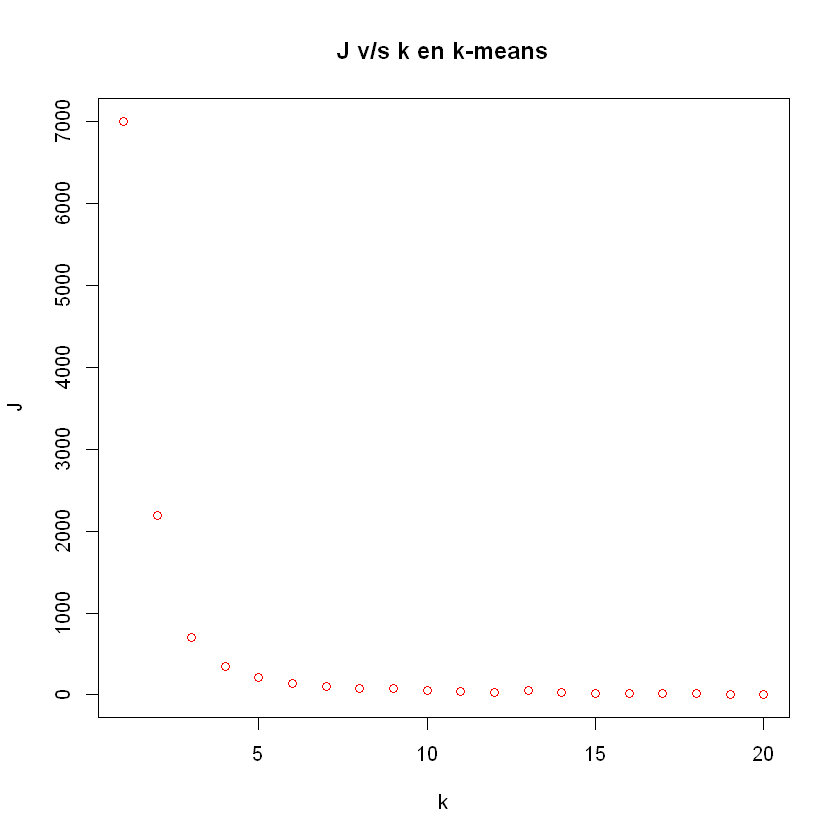

In [42]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?

In [43]:
J<-rep(0,20)
pend<-rep(0,19)
fin_iter<-20
k<-1

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    if(k>1){
        pend[k-1]<-J[k-1]-J[k]}
}
for (i in 1:49){
    if(pend[i]<20){
        k<-i+1
        break
    }
    
}
print(mejor_k)

[1] 10


El mejor valor de k es de 10

### Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [44]:
facebook <- read.csv("DatosUsoFacebook.csv", sep = ";", header = TRUE)
summary(facebook)

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

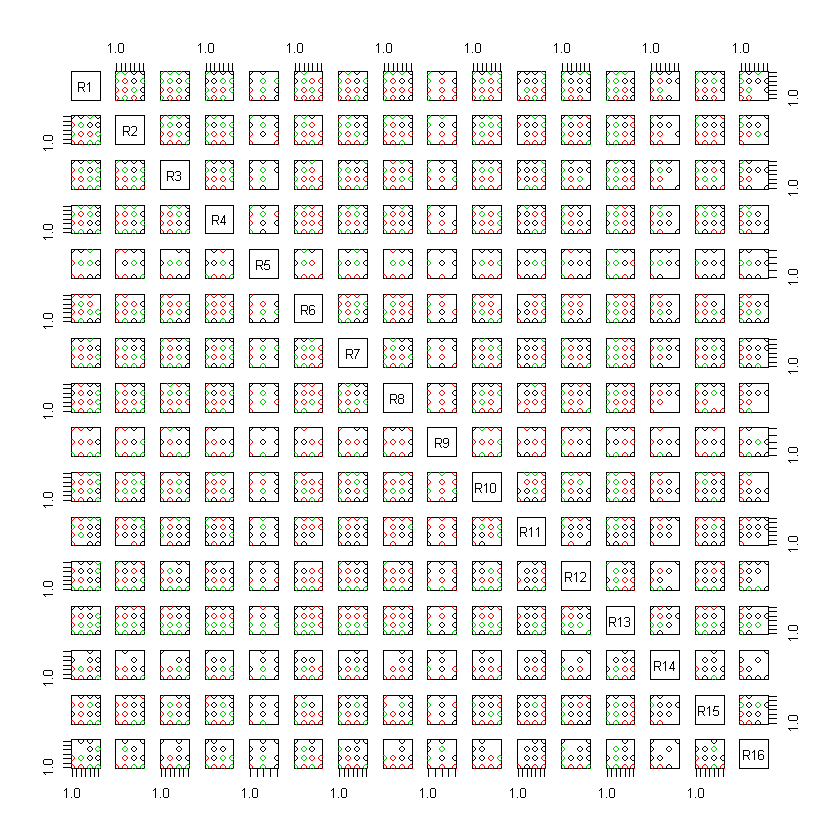

In [53]:
k0=3
clu<-kmeans(facebook,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(facebook,col=clu$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-1.9640940,0.005146976,0.08826043,0.1923144,0.09603946,0.2744221,-0.124458901,0.04911102,-0.09312990,0.10462274,-0.04846151,0.004362324,0.03264790,0.05154131,0.02330919,-0.068182730
2,1.0302667,1.055479980,0.49534482,0.2095158,0.19640450,0.2405863,0.124619750,-0.13222125,0.05544838,-0.22388861,-0.02686656,-0.074708441,-0.06584538,-0.08950587,-0.04103342,0.070709845
3,0.6174081,-0.819943674,-0.44661418,-0.3004919,-0.22103456,-0.3836373,-0.006762198,0.06689116,0.02417345,0.09781215,0.05566909,0.054633654,0.02741393,0.03210812,0.01494990,-0.005590715


K-means clustering with 3 clusters of sizes 54, 58, 75

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.833333 2.925926 3.074074 2.388889 1.629630 1.685185 2.796296 3.037037
2 1.879310 2.172414 2.206897 2.137931 1.275862 2.310345 2.103448 2.275862
3 2.880000 2.706667 2.360000 2.266667 1.200000 1.693333 2.280000 2.640000
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.629630 1.833333 2.759259 2.203704 2.759259 1.592593 2.388889 1.648148
2 1.362069 2.206897 3.534483 1.741379 3.051724 1.327586 1.482759 1.241379
3 1.226667 1.853333 3.466667 1.413333 1.813333 1.146667 1.413333 1.160000

Clustering vector:
  [1] 2 3 2 2 2 3 3 2 3 2 2 3 3 1 1 3 2 2 1 1 1 3 1 1 3 3 1 2 3 3 2 1 1 3 2 2 3
 [38] 2 2 2 3 2 1 1 3 3 2 3 2 2 3 2 2 1 1 3 2 1 1 1 3 1 3 3 3 1 3 1 1 1 1 3 3 1
 [75] 3 3 2 3 2 2 3 3 1 1 1 2 3 3 2 1 3 1 2 3 1 2 2 2 3 3 1 2 2 3 2 3 2 2 3 2 3
[112] 1 2 1 3 2 3 3 3 3 2 3 3 3 3 3 3 1 2 2 1 3 1 2 1 1 1 1 2 2 3 3 2 1 2 3 1

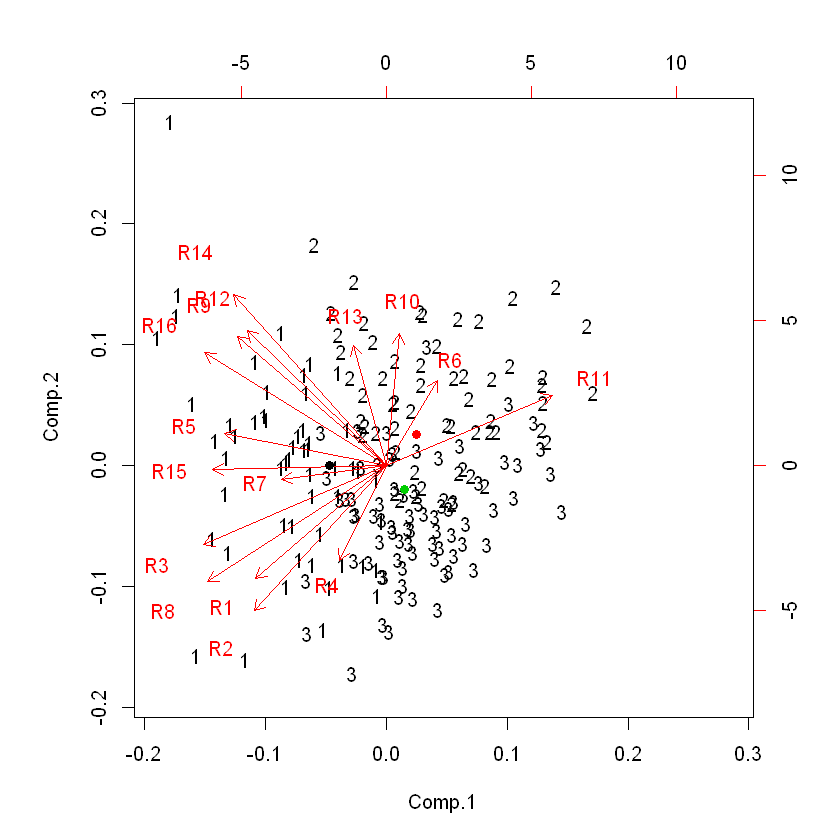

In [54]:
res <- princomp(facebook, cor=TRUE)
res2 <- predict(res,clu$centers)
res2
clu
biplot(res,xlabs=clu$cluster)
points(res2[,1:2],col=1:k0,pch=19)

Con 3 grupos se puede apreciar que los datos clasificados con la etiqueta **1** son los que en los atributos R4,R1,R2,R8,R3,R5,R15,R7,R16,R9,R12,R14 presentaron un valor más alto
mientras que los datos con la etiqueta **2** son los que en las variables R13,R10,R6 y R11 presentaron valores más alto
y por ultimo los datos con las etiqueta **3** son los que presentaron valores más bajo en todos los atributos a excepcion del atributo R2 y R4

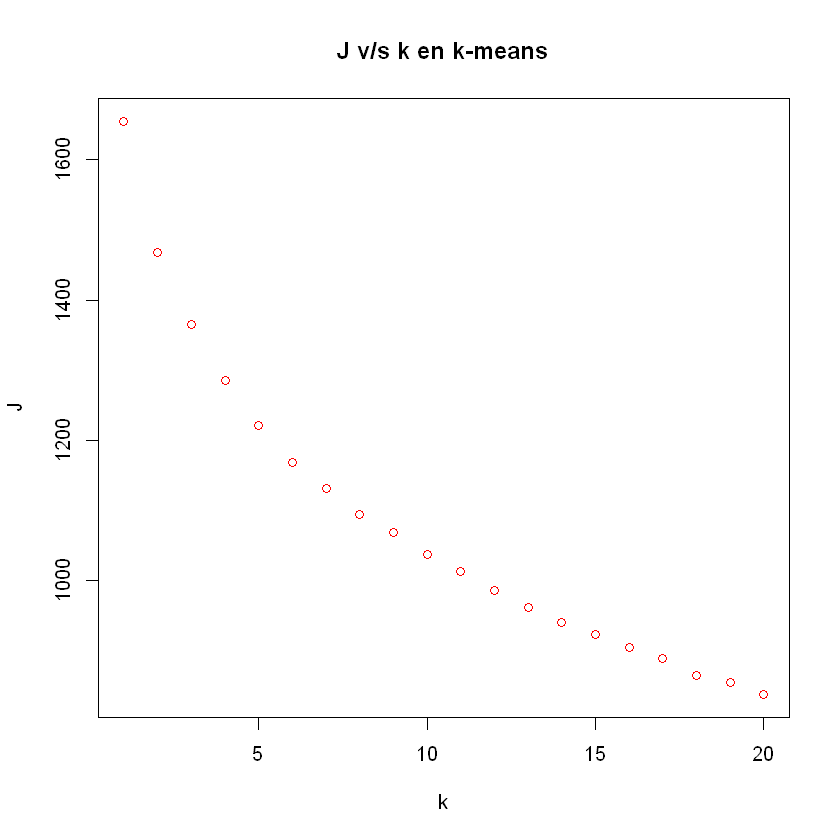

In [51]:
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
    cl<-kmeans(facebook,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    
}
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2)

In [50]:
J<-rep(0,20)
pend<-rep(0,19)
fin_iter<-20
kface<-1

for (k in 1:fin_iter){
    cl<-kmeans(facebook,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
    if(k>1){
        pend[k-1]<-J[k-1]-J[k]}
}
for (i in 1:49){
    if(pend[i]<20){
        kface<-i+1
        break
    }
    
}
print(kface)

[1] 14


Realizando el mismo analisis para determinar la cantidad optima de grupos, el valor obtenido es 14 grupos